In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## import dataset

In [2]:
data = pd.read_csv('../artifacts/ds.csv')

In [3]:
data.head()

,category (text),category (binary),sentiment (text),sentiment (binary),feedback
0,claim,0,negative,1,I'm extremely disappointed with the lengthy an...
1,claim,0,negative,1,# Inefficient communication and lack of transp...
2,claim,0,negative,1,I recently had a terrible experience with the ...
3,claim,0,negative,1,##$ I am extremely dissatisfied with the vehic...
4,claim,0,negative,1,# Poor communication throughout the entire pro...


## Data Preprocessing

In [4]:
data.shape

(7585, 5)

#### remove duplicates

In [5]:
data.duplicated().sum()

np.int64(110)

In [6]:
duplicates = data[data.duplicated()]
print(duplicates)


     category (text)  category (binary) sentiment (text)  sentiment (binary)  \
38             claim                  0         negative                   1   
41             claim                  0         negative                   1   
497            claim                  0         negative                   1   
498            claim                  0         negative                   1   
572            claim                  0         negative                   1   
...              ...                ...              ...                 ...   
7266         service                  1         positive                   0   
7267         service                  1         positive                   0   
7268         service                  1         positive                   0   
7269         service                  1         positive                   0   
7463         service                  1         positive                   0   

                                       

In [7]:
data = data.drop_duplicates()
print(f"Dataset size after removing duplicates: {data.shape}")


Dataset size after removing duplicates: (7475, 5)


In [8]:
print(f"Remaining duplicates: {data.duplicated().sum()}")


Remaining duplicates: 0


#### checking null values

In [9]:
data.isnull().sum()

category (text)       0
category (binary)     0
sentiment (text)      0
sentiment (binary)    0
feedback              0
dtype: int64

### Text Preprocessing

##### convert upercase to lowercase

In [10]:
import re
import string

In [11]:
data["feedback"].head(5)

0    I'm extremely disappointed with the lengthy an...
1    # Inefficient communication and lack of transp...
2    I recently had a terrible experience with the ...
3    ##$ I am extremely dissatisfied with the vehic...
4    # Poor communication throughout the entire pro...
Name: feedback, dtype: object

In [12]:
data = data.copy()
data["feedback"] = data["feedback"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [13]:
data["feedback"].head()

0    i'm extremely disappointed with the lengthy an...
1    # inefficient communication and lack of transp...
2    i recently had a terrible experience with the ...
3    ##$ i am extremely dissatisfied with the vehic...
4    # poor communication throughout the entire pro...
Name: feedback, dtype: object

##### remove links

In [14]:
data["feedback"] = data["feedback"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [15]:
data["feedback"]

0       i'm extremely disappointed with the lengthy an...
1       # inefficient communication and lack of transp...
2       i recently had a terrible experience with the ...
3       ##$ i am extremely dissatisfied with the vehic...
4       # poor communication throughout the entire pro...
                              ...                        
7580    #### outstanding service from this vehicle ins...
7581    # excellent customer service at a vehicle insu...
7582    excellent service from the vehicle insurance c...
7583    # good service, excellent communication from i...
7584    ## outstanding customer service at triple aaa ...
Name: feedback, Length: 7475, dtype: object

##### remove punctuations

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["feedback"] = data["feedback"].apply(remove_punctuation)

In [18]:
data["feedback"].head(5)

0    im extremely disappointed with the lengthy and...
1     inefficient communication and lack of transpa...
2    i recently had a terrible experience with the ...
3     i am extremely dissatisfied with the vehicle ...
4     poor communication throughout the entire proc...
Name: feedback, dtype: object

##### remove numbers

In [19]:
data["feedback"].iloc[90]


'please investigate my claim asap communication has been poor throughout this process ive been waiting for 3 weeks and im still unsure about the status of my claim its unacceptable to keep customers in the dark about their claims the insurance company needs to improve its communication and claim processing time i demand a prompt response regarding the status of my claim this has been a terrible experience and im not satisfied with the service ive received so far'

In [20]:
data["feedback"] = data["feedback"].str.replace(r'\d+', '', regex=True)

In [21]:
data["feedback"].iloc[90]

'please investigate my claim asap communication has been poor throughout this process ive been waiting for  weeks and im still unsure about the status of my claim its unacceptable to keep customers in the dark about their claims the insurance company needs to improve its communication and claim processing time i demand a prompt response regarding the status of my claim this has been a terrible experience and im not satisfied with the service ive received so far'

##### remove stopwords

In [22]:
!pip install nltk

In [23]:
import nltk

##### downlad stopwords for english language

In [24]:
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw=file.read().splitlines()

In [26]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
data["feedback"] = data["feedback"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [28]:
data["feedback"].head(5)

0    im extremely disappointed lengthy unsatisfacto...
1    inefficient communication lack transparency th...
2    recently terrible experience vehicle insurance...
3    extremely dissatisfied vehicle insurance claim...
4    poor communication throughout entire process u...
Name: feedback, dtype: object

##### stemming

In [29]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [30]:
data["feedback"] = data["feedback"].apply(lambda x: " ".join([ps.stem(x) for x in x.split()]))

In [31]:
data

,category (text),category (binary),sentiment (text),sentiment (binary),feedback
0,claim,0,negative,1,im extrem disappoint lengthi unsatisfactori ve...
1,claim,0,negative,1,ineffici commun lack transpar throughout claim...
2,claim,0,negative,1,recent terribl experi vehicl insur claim proce...
3,claim,0,negative,1,extrem dissatisfi vehicl insur claim process t...
4,claim,0,negative,1,poor commun throughout entir process unwilling...
...,...,...,...,...,...
7580,service,1,positive,0,outstand servic vehicl insur compani team extr...
7581,service,1,positive,0,excel custom servic vehicl insur compani repre...
7582,service,1,positive,0,excel servic vehicl insur compani repres highl...
7583,service,1,positive,0,good servic excel commun insur compani repres ...


## Vectorization

##### Bulidng Vocabulary

In [32]:
from collections import Counter
vocab=Counter()

In [33]:
vocab

Counter()

In [34]:
for sentence in data["feedback"]:
    vocab.update(sentence.split())

In [35]:
len(vocab)

3324

In [36]:
data.shape

(7475, 5)

In [37]:
vocab

Counter({'insur': 10729,
         'polici': 7885,
         'compani': 6140,
         'custom': 6014,
         'vehicl': 5923,
         'servic': 5898,
         'claim': 5817,
         'process': 5001,
         'experi': 3515,
         'term': 3476,
         'provid': 2989,
         'im': 2730,
         'commun': 2485,
         'make': 2422,
         'coverag': 2283,
         'recommend': 2256,
         'would': 2161,
         'respons': 2089,
         'team': 2086,
         'transpar': 2065,
         'time': 2065,
         'clear': 2023,
         'issu': 1941,
         'frustrat': 1934,
         'understand': 1873,
         'lack': 1869,
         'resolv': 1766,
         'expect': 1615,
         'help': 1602,
         'anyon': 1597,
         'repres': 1547,
         'extrem': 1527,
         'receiv': 1522,
         'profession': 1505,
         'effici': 1428,
         'need': 1393,
         'fair': 1392,
         'highli': 1382,
         'overal': 1381,
         'poor': 1378,
         

##### creating vocabulary

In [38]:
tokens=[key for key in vocab if vocab[key]>20]

In [39]:
len(tokens)

923

##### save vocabulary

In [40]:
def save_vocubulary(lines, filename):
    data='\n'.join(lines)
    file=open(filename,'w',encoding='utf-8')
    file.write(data)
    file.close()

save_vocubulary(tokens,'../static/model/vocabulary.txt')

### Divide Dataset

In [41]:
X=data["feedback"]
Y=data["sentiment (binary)"]
Z=data["category (binary)"]

In [42]:
X

0       im extrem disappoint lengthi unsatisfactori ve...
1       ineffici commun lack transpar throughout claim...
2       recent terribl experi vehicl insur claim proce...
3       extrem dissatisfi vehicl insur claim process t...
4       poor commun throughout entir process unwilling...
                              ...                        
7580    outstand servic vehicl insur compani team extr...
7581    excel custom servic vehicl insur compani repre...
7582    excel servic vehicl insur compani repres highl...
7583    good servic excel commun insur compani repres ...
7584    outstand custom servic tripl aaa insur unparal...
Name: feedback, Length: 7475, dtype: object

In [43]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
7580    0
7581    0
7582    0
7583    0
7584    0
Name: sentiment (binary), Length: 7475, dtype: int64

In [44]:
Z

0       0
1       0
2       0
3       0
4       0
       ..
7580    1
7581    1
7582    1
7583    1
7584    1
Name: category (binary), Length: 7475, dtype: int64

In [45]:
!pip install scikit-learn

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test, Z_train, Z_test = train_test_split(X, Y, Z, test_size=0.2)

In [47]:
X_train.shape

(5980,)

In [48]:
len(X_test)

1495

In [49]:
len(Y_train)

5980

In [50]:
len(Y_test)

1495

In [51]:
len(Z_train)

5980

In [52]:
len(Z_test)

1495

### Vectorization

In [53]:
def vectorizer(ds,vocabulary):
    vectorized_list=[]

    for sentence in ds:
        sentence_list=np.zeros(len(vocabulary))
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i]=1
        vectorized_list.append(sentence_list)

    vectorized_list_new=np.asarray(vectorized_list,dtype=np.float32)
    return vectorized_list_new
    

##### vextorized the training feedbacks

In [54]:
vectorized_X_train=vectorizer(X_train,tokens)

In [55]:
for i in vectorized_X_train[0]:
    print(i)

1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [56]:
vectorized_X_train[0]

array([1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

##### vectorize the test feedbacks

In [57]:
vectorized_X_test=vectorizer(X_test,tokens)

In [58]:
vectorized_X_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [59]:
vectorized_X_train

array([[1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [60]:
Y_train

5873     1
377      1
5037     0
129      1
6759     0
        ..
2003     0
5864     1
3551    10
2505     1
6945     0
Name: sentiment (binary), Length: 5980, dtype: int64

In [61]:
Y_train.value_counts()

sentiment (binary)
1     2409
0     1989
10    1582
Name: count, dtype: int64

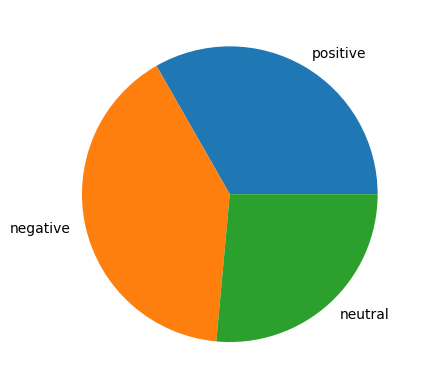

In [62]:
plt.pie(np.array([Y_train.value_counts()[0],Y_train.value_counts()[1],Y_train.value_counts()[10]]),labels=['positive','negative','neutral'])
plt.show()

In [63]:
Z_train.value_counts()

category (binary)
10    2040
1     1998
0     1942
Name: count, dtype: int64

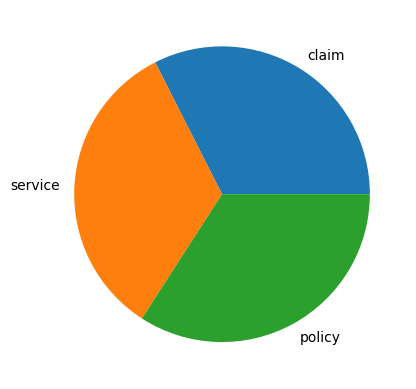

In [64]:
plt.pie(np.array([Z_train.value_counts()[0],Z_train.value_counts()[1],Z_train.value_counts()[10]]),labels=['claim','service','policy'])
plt.show()

### Handle imbalance dataset

In [65]:
!pip install imbalanced-learn

In [66]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
vectorized_X_train_smote,Y_train_smote=smote.fit_resample(vectorized_X_train,Y_train)
print(vectorized_X_train_smote.shape,Y_train_smote.shape)

(7227, 923) (7227,)


In [67]:
Y_train_smote.value_counts()

sentiment (binary)
1     2409
0     2409
10    2409
Name: count, dtype: int64

In [68]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
vectorized_X_train_smote_category,Z_train_smote=smote.fit_resample(vectorized_X_train,Z_train)
print(vectorized_X_train_smote_category.shape,Z_train_smote.shape)

(6120, 923) (6120,)


In [69]:
Z_train_smote.value_counts()

category (binary)
1     2040
0     2040
10    2040
Name: count, dtype: int64

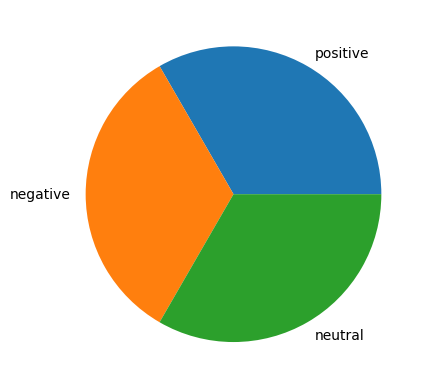

In [70]:
plt.pie(np.array([Y_train_smote.value_counts()[0],Y_train_smote.value_counts()[1],Y_train_smote.value_counts()[10]]),labels=['positive','negative','neutral'])
plt.show()

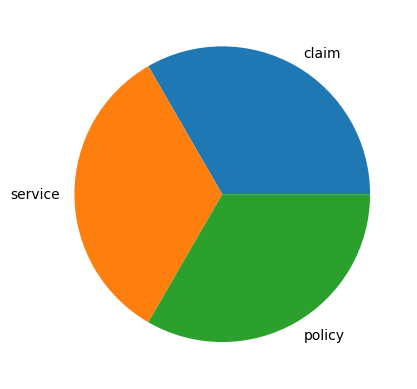

In [71]:
plt.pie(np.array([Z_train_smote.value_counts()[0],Z_train_smote.value_counts()[1],Z_train_smote.value_counts()[10]]),labels=['claim','service','policy'])
plt.show()

##### using this dataset for train & test the sentiment models

In [72]:
vectorized_X_train_smote

array([[1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [73]:
Y_train_smote

0        1
1        1
2        0
3        1
4        0
        ..
7222    10
7223    10
7224    10
7225    10
7226    10
Name: sentiment (binary), Length: 7227, dtype: int64

In [74]:
vectorized_X_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [75]:
Y_test

284      1
3004     1
3349    10
676      1
2303     0
        ..
465      1
4268     0
6708    10
7065     0
4957     0
Name: sentiment (binary), Length: 1495, dtype: int64

##### using this dataset for train & test the models for categorization

In [76]:
vectorized_X_train_smote_category

array([[1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [77]:
Z_train_smote

0        1
1        0
2       10
3        0
4        1
        ..
6115     1
6116     1
6117     1
6118     1
6119     1
Name: category (binary), Length: 6120, dtype: int64

In [78]:
vectorized_X_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [79]:
Z_test

284      0
3004    10
3349    10
676      0
2303     0
        ..
465      0
4268    10
6708     1
7065     1
4957    10
Name: category (binary), Length: 1495, dtype: int64

## Model Training & Evaluation 

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### Model Training & Evaluation for Sentiment

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    prec = round(precision_score(y_act, y_pred, average='weighted'), 3)  # Specify average
    rec = round(recall_score(y_act, y_pred, average='weighted'), 3)  # Specify average
    f1 = round(f1_score(y_act, y_pred, average='weighted'), 3)  # Specify average
    
    print(f'Training Scores:\n\tAccuracy: {acc}\n\tPrecision: {prec}\n\tRecall: {rec}\n\tF1-Score: {f1}\n')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    prec = round(precision_score(y_act, y_pred, average='weighted'), 3)  # Specify average
    rec = round(recall_score(y_act, y_pred, average='weighted'), 3)  # Specify average
    f1 = round(f1_score(y_act, y_pred, average='weighted'), 3)  # Specify average
    
    print(f'Testing Scores:\n\tAccuracy: {acc}\n\tPrecision: {prec}\n\tRecall: {rec}\n\tF1-Score: {f1}\n')


##### logistic regression

In [82]:
lr=LogisticRegression()
lr.fit(vectorized_X_train_smote,Y_train_smote)

LogisticRegression()

In [83]:
Y_train_predict=lr.predict(vectorized_X_train_smote)

In [84]:
Y_train_predict

array([ 1,  1,  0, ..., 10, 10, 10])

In [85]:
Y_train_smote

0        1
1        1
2        0
3        1
4        0
        ..
7222    10
7223    10
7224    10
7225    10
7226    10
Name: sentiment (binary), Length: 7227, dtype: int64

In [86]:
training_scores(Y_train_smote,Y_train_predict)

Training Scores:
	Accuracy: 0.984
	Precision: 0.984
	Recall: 0.984
	F1-Score: 0.984



In [87]:
Y_test_predict=lr.predict(vectorized_X_test)

In [88]:
Y_test_predict

array([10,  1, 10, ..., 10,  0,  0])

In [89]:
Y_test

284      1
3004     1
3349    10
676      1
2303     0
        ..
465      1
4268     0
6708    10
7065     0
4957     0
Name: sentiment (binary), Length: 1495, dtype: int64

In [90]:
validation_scores(Y_test, Y_test_predict)

Testing Scores:
	Accuracy: 0.896
	Precision: 0.898
	Recall: 0.896
	F1-Score: 0.897



##### Naive Bayes

In [91]:
mnb=MultinomialNB()
mnb.fit(vectorized_X_train_smote,Y_train_smote)
Y_train_predict=mnb.predict(vectorized_X_train_smote)
Y_test_predict=mnb.predict(vectorized_X_test)
training_scores(Y_train_smote,Y_train_predict)
validation_scores(Y_test, Y_test_predict)

Training Scores:
	Accuracy: 0.911
	Precision: 0.915
	Recall: 0.911
	F1-Score: 0.911

Testing Scores:
	Accuracy: 0.901
	Precision: 0.907
	Recall: 0.901
	F1-Score: 0.902



##### Decision Tree

In [92]:
dt=DecisionTreeClassifier()
dt.fit(vectorized_X_train_smote,Y_train_smote)
Y_train_predict=dt.predict(vectorized_X_train_smote)
Y_test_predict=dt.predict(vectorized_X_test)
training_scores(Y_train_smote,Y_train_predict)
validation_scores(Y_test, Y_test_predict)

Training Scores:
	Accuracy: 1.0
	Precision: 1.0
	Recall: 1.0
	F1-Score: 1.0

Testing Scores:
	Accuracy: 0.874
	Precision: 0.874
	Recall: 0.874
	F1-Score: 0.874



##### Random forest

In [93]:
rf=RandomForestClassifier()
rf.fit(vectorized_X_train_smote,Y_train_smote)
Y_train_predict=rf.predict(vectorized_X_train_smote)
Y_test_predict=rf.predict(vectorized_X_test)
training_scores(Y_train_smote,Y_train_predict)
validation_scores(Y_test, Y_test_predict)

Training Scores:
	Accuracy: 1.0
	Precision: 1.0
	Recall: 1.0
	F1-Score: 1.0

Testing Scores:
	Accuracy: 0.913
	Precision: 0.913
	Recall: 0.913
	F1-Score: 0.913



##### Support vector machine

In [94]:
svm=SVC()
svm.fit(vectorized_X_train_smote,Y_train_smote)
Y_train_predict=svm.predict(vectorized_X_train_smote)
Y_test_predict=svm.predict(vectorized_X_test)
training_scores(Y_train_smote,Y_train_predict)
validation_scores(Y_test, Y_test_predict)

Training Scores:
	Accuracy: 0.987
	Precision: 0.987
	Recall: 0.987
	F1-Score: 0.987

Testing Scores:
	Accuracy: 0.913
	Precision: 0.914
	Recall: 0.913
	F1-Score: 0.913



### saving the model

In [95]:
import pickle
with open ('../static/model/sentiment_model.pickle','wb') as file:
    pickle.dump(mnb,file)

### Model Training & Evaluation for Categorization

##### logistic regression

In [96]:
lrc=LogisticRegression()
lrc.fit(vectorized_X_train_smote_category,Z_train_smote)

LogisticRegression()

In [97]:
Z_train_predict=lrc.predict(vectorized_X_train_smote_category)

In [98]:
Z_train_predict

array([ 1,  0, 10, ...,  1,  1,  1])

In [99]:
Z_train_smote

0        1
1        0
2       10
3        0
4        1
        ..
6115     1
6116     1
6117     1
6118     1
6119     1
Name: category (binary), Length: 6120, dtype: int64

In [100]:
training_scores(Z_train_smote,Z_train_predict)

Training Scores:
	Accuracy: 0.998
	Precision: 0.998
	Recall: 0.998
	F1-Score: 0.998



In [101]:
Z_test_predict=lrc.predict(vectorized_X_test)

In [102]:
Z_test_predict

array([ 0, 10, 10, ...,  1,  1, 10])

In [103]:
Z_test

284      0
3004    10
3349    10
676      0
2303     0
        ..
465      0
4268    10
6708     1
7065     1
4957    10
Name: category (binary), Length: 1495, dtype: int64

In [104]:
 validation_scores(Z_test, Z_test_predict)

Testing Scores:
	Accuracy: 0.984
	Precision: 0.984
	Recall: 0.984
	F1-Score: 0.984



##### Naive Baiyes

In [105]:
mnbc=MultinomialNB()
mnbc.fit(vectorized_X_train_smote_category,Z_train_smote)
Z_train_predict=mnbc.predict(vectorized_X_train_smote_category)
Z_test_predict=mnbc.predict(vectorized_X_test)
training_scores(Z_train_smote,Z_train_predict)
validation_scores(Z_test, Z_test_predict)

Training Scores:
	Accuracy: 0.968
	Precision: 0.968
	Recall: 0.968
	F1-Score: 0.968

Testing Scores:
	Accuracy: 0.972
	Precision: 0.972
	Recall: 0.972
	F1-Score: 0.972



##### Decision Tree

In [106]:
dtc=DecisionTreeClassifier()
dtc.fit(vectorized_X_train_smote_category,Z_train_smote)
Z_train_predict=dtc.predict(vectorized_X_train_smote_category)
Z_test_predict=dtc.predict(vectorized_X_test)
training_scores(Z_train_smote,Z_train_predict)
validation_scores(Z_test, Z_test_predict)

Training Scores:
	Accuracy: 1.0
	Precision: 1.0
	Recall: 1.0
	F1-Score: 1.0

Testing Scores:
	Accuracy: 0.938
	Precision: 0.938
	Recall: 0.938
	F1-Score: 0.938



##### Random Forest

In [107]:
rfc=RandomForestClassifier()
rfc.fit(vectorized_X_train_smote_category,Z_train_smote)
Z_train_predict=rfc.predict(vectorized_X_train_smote_category)
Z_test_predict=rfc.predict(vectorized_X_test)
training_scores(Z_train_smote,Z_train_predict)
validation_scores(Z_test, Z_test_predict)

Training Scores:
	Accuracy: 1.0
	Precision: 1.0
	Recall: 1.0
	F1-Score: 1.0

Testing Scores:
	Accuracy: 0.98
	Precision: 0.98
	Recall: 0.98
	F1-Score: 0.98



##### Support vector machine

In [108]:
svmc=SVC()
svmc.fit(vectorized_X_train_smote_category,Z_train_smote)
Z_train_predict=svmc.predict(vectorized_X_train_smote_category)
Z_test_predict=svmc.predict(vectorized_X_test)
training_scores(Z_train_smote,Z_train_predict)
validation_scores(Z_test, Z_test_predict)

Training Scores:
	Accuracy: 0.994
	Precision: 0.994
	Recall: 0.994
	F1-Score: 0.994

Testing Scores:
	Accuracy: 0.983
	Precision: 0.983
	Recall: 0.983
	F1-Score: 0.983



### Saving the model

In [109]:
import pickle
with open ('../static/model/categorization_model.pickle','wb') as file:
    pickle.dump(mnbc,file)